In [179]:
import matplotlib.pyplot as plt
import pandas as pd

In [180]:
model_output = pd.read_csv('model_output.csv')
model_output

,Datetime,PowerOut,ArrayPower,Service,DelvrEff,BatSoc,BatDrain,BatPwr,Warn,Month,DayofMonth,DayofYear,AC_Load,DC_Load,Total_Load
0,2021-01-01 00:00:00-07:00,4.022222,-0.0,1.0,0.0,97.951646,-4.424444,210.798351,NaN,1,1,1,0.0,3.5,3.5
1,2021-01-01 01:00:00-07:00,4.022222,-0.0,1.0,0.0,95.895740,-4.424444,205.594038,NaN,1,1,1,0.0,3.5,3.5
2,2021-01-01 02:00:00-07:00,4.022222,-0.0,1.0,0.0,93.832035,-4.424444,200.386980,NaN,1,1,1,0.0,3.5,3.5
3,2021-01-01 03:00:00-07:00,4.022222,-0.0,1.0,0.0,91.760271,-4.424444,195.177091,NaN,1,1,1,0.0,3.5,3.5
4,2021-01-01 04:00:00-07:00,4.022222,-0.0,1.0,0.0,89.680169,-4.424444,189.964279,NaN,1,1,1,0.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00-07:00,4.022222,-0.0,1.0,0.0,93.832035,-4.424444,200.386980,NaN,12,31,365,0.0,3.5,3.5
8756,2021-12-31 20:00:00-07:00,4.022222,-0.0,1.0,0.0,91.760271,-4.424444,195.177091,NaN,12,31,365,0.0,3.5,3.5
8757,2021-12-31 21:00:00-07:00,4.022222,-0.0,1.0,0.0,89.680169,-4.424444,189.964279,NaN,12,31,365,0.0,3.5,3.5
8758,2021-12-31 22:00:00-07:00,4.022222,-0.0,1.0,0.0,87.591435,-4.424444,184.748449,NaN,12,31,365,0.0,3.5,3.5


In [181]:
battery_soc = model_output[['Datetime', 'BatSoc']].copy()
battery_soc['Datetime'] = pd.to_datetime(battery_soc['Datetime'])
battery_soc = battery_soc.set_index(battery_soc['Datetime'])
battery_soc = battery_soc.drop(['Datetime'], axis=1)
battery_soc = battery_soc.resample('360T').mean()
battery_soc

,BatSoc
Datetime,
2021-01-01 00:00:00-07:00,92.785216
2021-01-01 06:00:00-07:00,94.245105
2021-01-01 12:00:00-07:00,99.658608
2021-01-01 18:00:00-07:00,90.708900
2021-01-02 00:00:00-07:00,78.060774
...,...
2021-12-30 18:00:00-07:00,90.708900
2021-12-31 00:00:00-07:00,78.060774
2021-12-31 06:00:00-07:00,85.274370


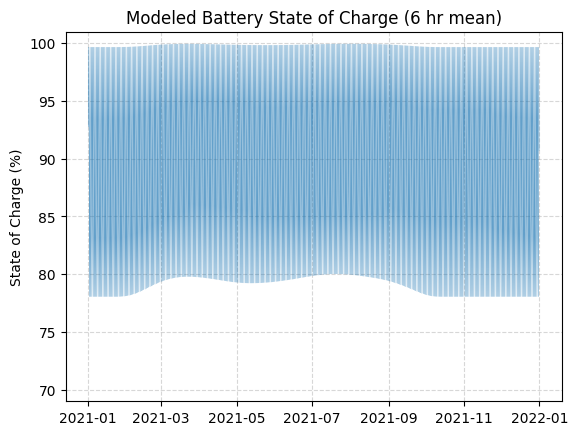

In [182]:
# battery_soc = battery_soc.head(730)

xs = battery_soc.index
ys = battery_soc['BatSoc']

fig = plt.figure()
ax = fig.subplots()
ax.set_title("Modeled Battery State of Charge (6 hr mean)")
ax.set_ylabel("State of Charge (%)")
ax.set_ylim(bottom=69, top=101)
ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.plot(xs, ys, linewidth=0.25)


In [183]:
service_uptime = model_output[['Datetime', 'Service']].copy()
service_uptime['Datetime'] = pd.to_datetime(service_uptime['Datetime'])
service_uptime = service_uptime.set_index(service_uptime['Datetime'])
service_uptime = service_uptime.drop(['Datetime'], axis=1)
service_uptime = service_uptime.resample('360T').mean()
service_uptime

,Service
Datetime,
2021-01-01 00:00:00-07:00,1.0
2021-01-01 06:00:00-07:00,1.0
2021-01-01 12:00:00-07:00,1.0
2021-01-01 18:00:00-07:00,1.0
2021-01-02 00:00:00-07:00,1.0
...,...
2021-12-30 18:00:00-07:00,1.0
2021-12-31 00:00:00-07:00,1.0
2021-12-31 06:00:00-07:00,1.0


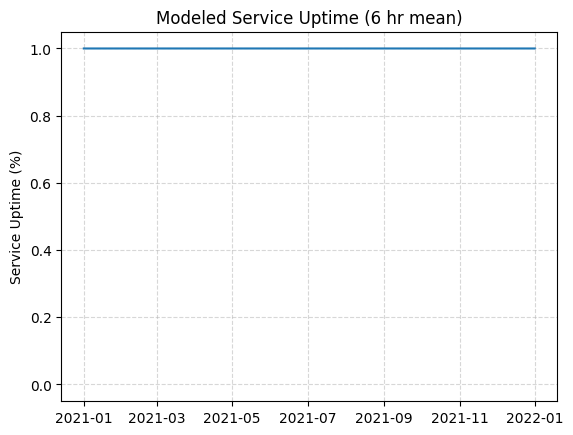

In [184]:
xs = service_uptime.index
ys = service_uptime['Service']

fig = plt.figure()
ax = fig.subplots()
ax.set_title("Modeled Service Uptime (6 hr mean)")
ax.set_ylabel("Service Uptime (%)")
ax.set_ylim(bottom=-0.05, top=1.05)
ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.plot(xs, ys)